# Taking liquid argon files and producing downsized images to interpret

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# use magic
%matplotlib inline

In [2]:
run lar_visualize.py photon_1-1462232439.h5 10

0.88560628891
0.596683621407
0.21325647831
0.145797133446
1.19147992134
0.646011352539
0.527161955833
1.33035326004
1.27446448803
0.683791637421


In [3]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [4]:
print np.max(data)

2540.0


In [5]:
print np.min(data)

-310.0


In [6]:
240 * 4096

983040

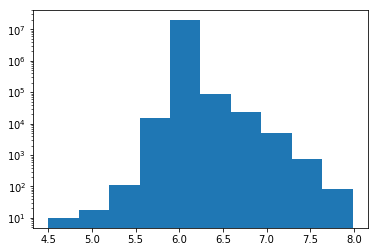

In [7]:
#my_vals = data[0][0].flatten()
my_vals = np.log(data[:,:,:,:].flatten() + 400)

plt.hist(my_vals)
plt.yscale('log', nonposy='clip')
plt.show()

In [8]:
my_vals_copy = my_vals.copy()

In [9]:
my_vals_copy[np.where(my_vals >= 0)] = 0

In [10]:
my_vals_copy = my_vals_copy.reshape((10, 2, 240, 4096))

In [11]:
my_vals_copy.shape

(10, 2, 240, 4096)

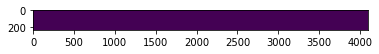

In [12]:
plt.imshow(my_vals_copy[1][0])
plt.show()

In [13]:
print data.shape
print data.size
# print data

(10, 2, 240, 4096)
19660800


In [14]:
shp = list(data.shape)
shp[-1] = shp[-1] / 4   # downsample by 4
simpledata=np.zeros(shp)
print simpledata.shape
print simpledata.size
# print simpledata

(10, 2, 240, 1024)
4915200


In [15]:
for event_n in range(data.shape[0]):
    y=0
    for x in my_range(0, 4096, 4):
        if x == 0:
            print 'checking shapes for event =', event_n
            print '  simpledata slice shape =', simpledata[event_n,:,:,y:(y+1)].shape
            print '  mean(data) slice shape =', np.nanmean(data[event_n,:,:,x:(x+4)], axis=2).shape 
        simpledata[event_n,:,:,y:(y+1)] = np.nanmean(data[event_n,:,:,x:(x+4)], axis=2).reshape(2,240,1)
        y+=1

# print simpledata

checking shapes for event = 0
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 1
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)


/Users/jwc/miniconda2/envs/py2cg/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


checking shapes for event = 2
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 3
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 4
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 5
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 6
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 7
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 8
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)
checking shapes for event = 9
  simpledata slice shape = (2, 240, 1)
  mean(data) slice shape = (2, 240)


In [16]:
def plot_event(img, minv=0, maxv=1000):
    fig = plt.figure(figsize=(12, 8))
    gs = plt.GridSpec(1, 2)
    for i in range(2):
        ax = plt.subplot(gs[i])
        ax.axis('on')
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())

        cmap = 'inferno'
        im = ax.imshow(img[i], cmap=pylab.get_cmap(cmap),
                       interpolation='nearest', vmin=minv, vmax=maxv)
        cbar = plt.colorbar(im, fraction=0.04)
        cbar.set_label(colorbar_tile, size=9)
        cbar.ax.tick_params(labelsize=6)
        plt.title("lar", fontsize=12)
        plt.xlabel("wire", fontsize=10)
        plt.ylabel("tick", fontsize=10)

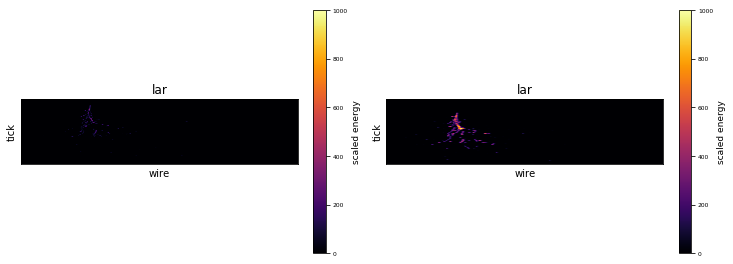

In [17]:
plot_event(simpledata[0])

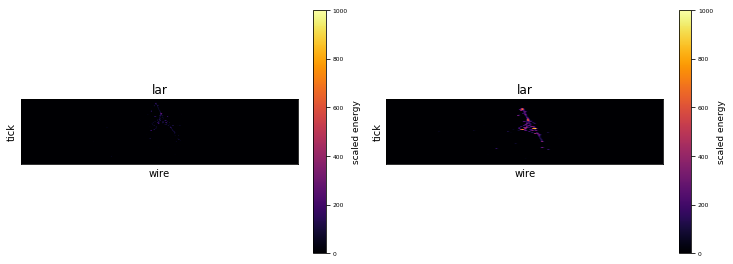

In [18]:
plot_event(simpledata[1])

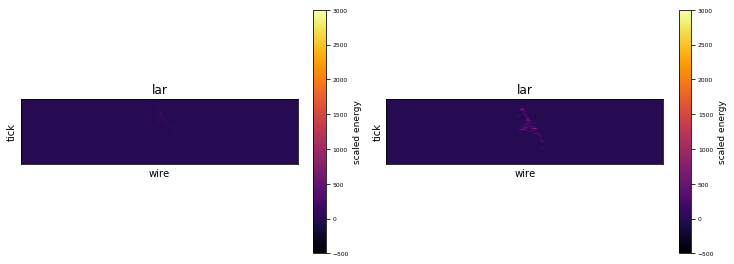

In [19]:
plot_event(simpledata[1], minv=-500, maxv=3000)

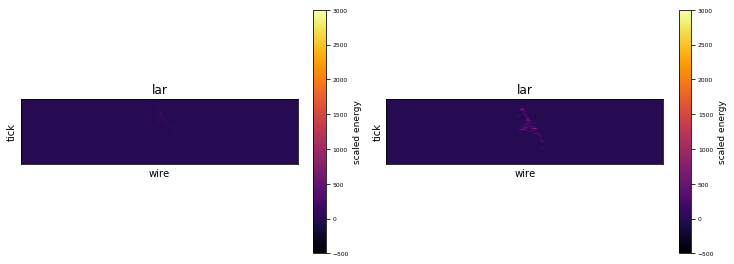

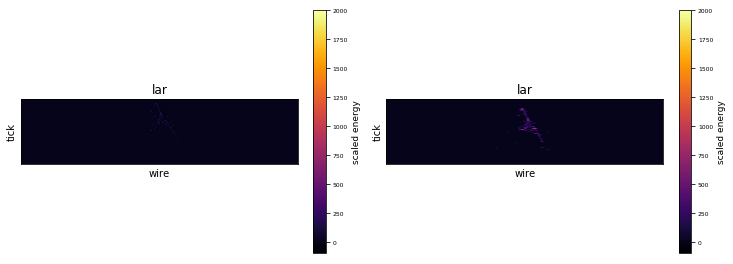

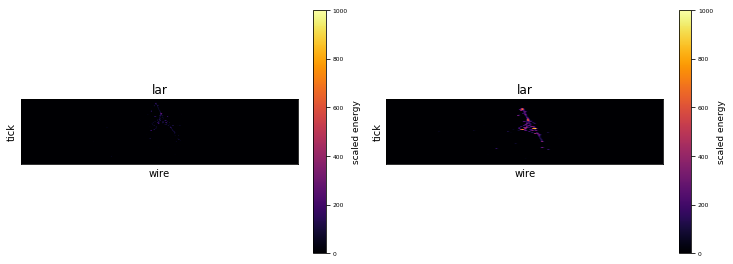

In [20]:
for minv, maxv in [(-500, 3000), (-100, 2000), (0, 1000)]:
    plot_event(simpledata[1], minv=minv, maxv=maxv)

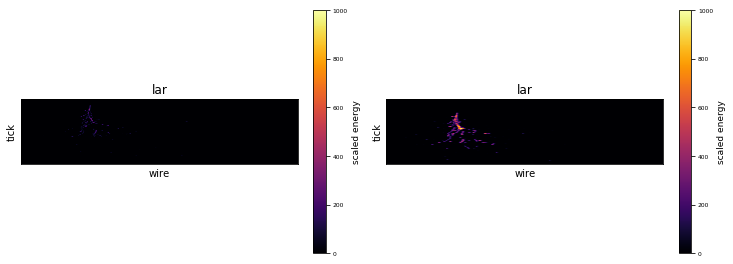

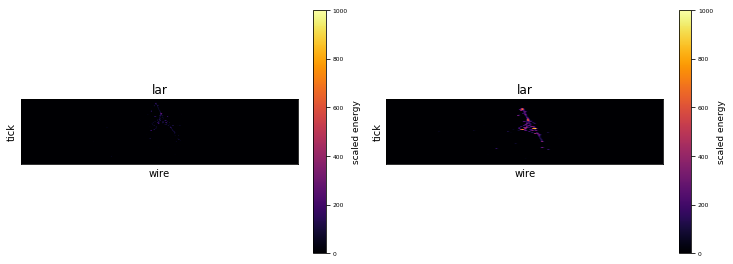

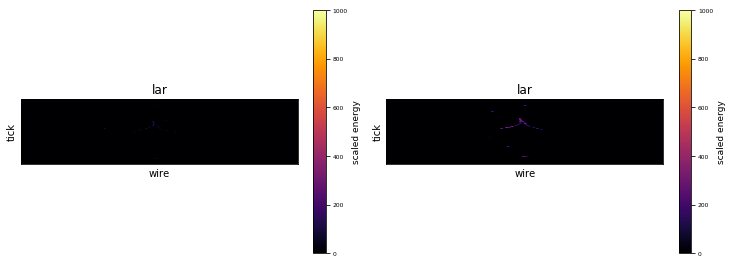

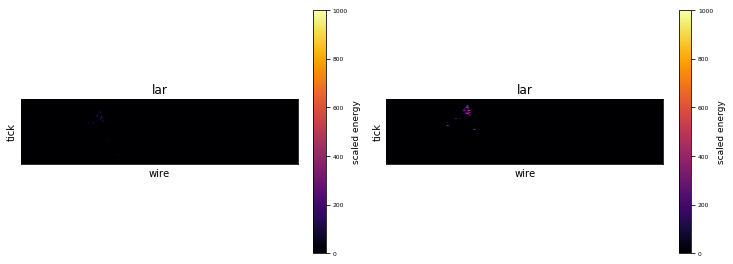

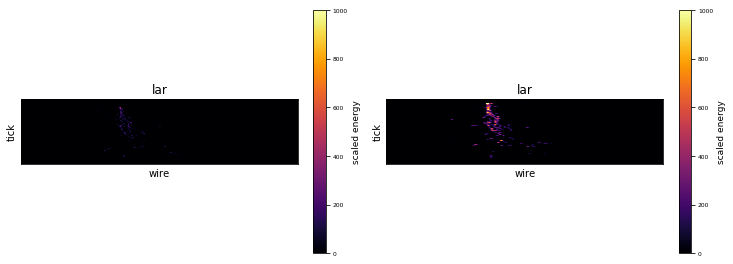

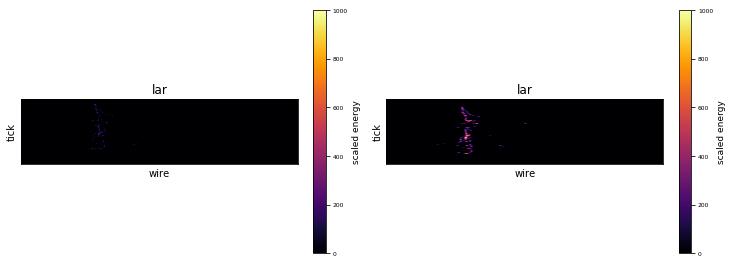

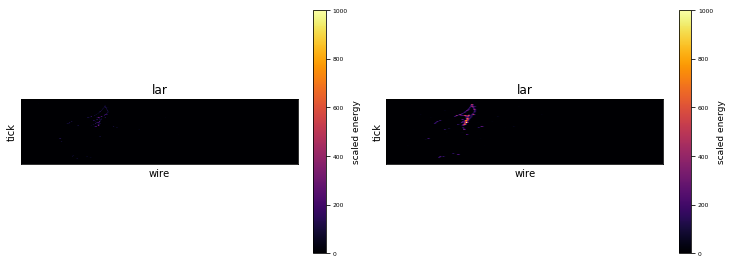

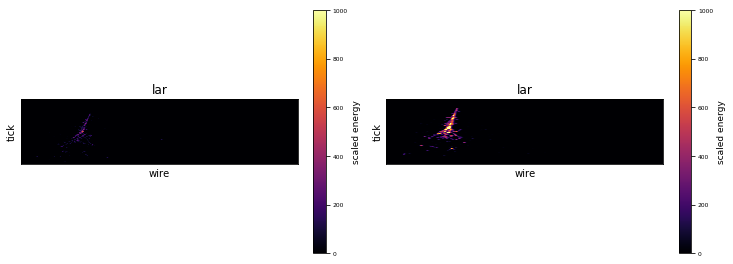

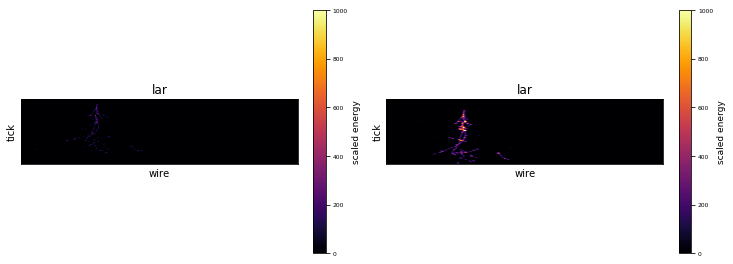

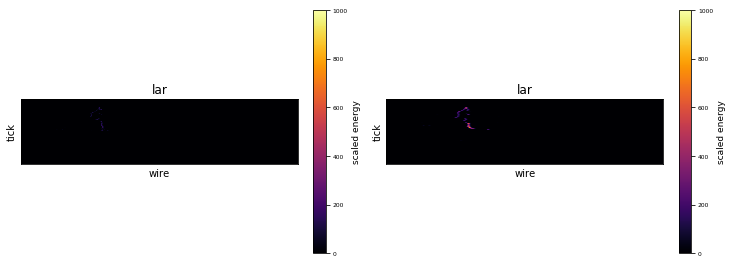

In [22]:
for x in range(0,10):
    plot_event(simpledata[x])